# EE 511 Assignment 2 - PartII
University of Washington<br>
Code by John Ragland and Doruk Arisoy<br>
Winter 2021

In [1]:
# Supress Warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import tools
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error

tools.check_sklearn_version()

# Some magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## \[Step 3\] Load training, validation and testing data

In [2]:
train, valid, test = tools.load_data()

## \[Step 4\] One variable least squares linear regression 

In [3]:
area_label = 'Gr Liv Area'
price_label = 'SalePrice'

area_train = train[area_label].to_numpy()
area_valid = valid[area_label].to_numpy()
area_test = test[area_label].to_numpy()
price_train = train[price_label].to_numpy()
price_valid = valid[price_label].to_numpy()
price_test = test[price_label].to_numpy()

In [4]:
small_model = LinearRegression().fit(area_train.reshape(-1, 1), price_train)

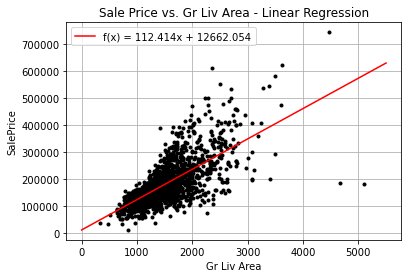

In [5]:
x = np.linspace(0, 5500, 100)
y = small_model.coef_[0] * x + small_model.intercept_

plt.xlabel(area_label)
plt.ylabel(price_label)
plt.plot(area_train, price_train, '.', color='black')
plt.plot(x, y, '-r', label="f(x) = %.3fx + %.3f" % (small_model.coef_[0], small_model.intercept_))
plt.legend()
plt.title('Sale Price vs. Gr Liv Area - Linear Regression')
plt.grid()

In [6]:
price_predicted = small_model.predict(area_valid.reshape(-1, 1))
print("RMSE = $%.2f" % mean_squared_error(price_valid, price_predicted, squared=False))

RMSE = $56299.05


## \[Step 5\] Adding more features to the simple model

In [7]:
train_without_price = train.drop(price_label, 1).to_numpy()
valid_without_price = valid.drop(price_label, 1).to_numpy()
test_without_price = test.drop(price_label, 1).to_numpy()

In [8]:
large_model = LinearRegression().fit(train_without_price, price_train)
pred = large_model.predict(valid_without_price)
print("RMSE = $%.2f" % mean_squared_error(price_valid, pred, squared=False))

RMSE = $26700.24


## \[Step 6\] Adding L1 regularization

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
this will come in handy

In [9]:
# Search for best value of alpha
alphas = np.linspace(0,200,100)
mse_valid = []
mse_train = []
for alpha in alphas:
    large_model_lasso = Lasso(alpha=alpha)
    large_model_lasso.fit(train_without_price, price_train)
    pred_valid = large_model_lasso.predict(valid_without_price)
    pred_train = large_model_lasso.predict(train_without_price)
    mse_valid.append(mean_squared_error(price_valid, pred_valid, squared=False))
    mse_train.append(mean_squared_error(price_train, pred_train, squared=False))

Best Performance for α = 40.40404040404041
Best RMSE = $24204.721975819444


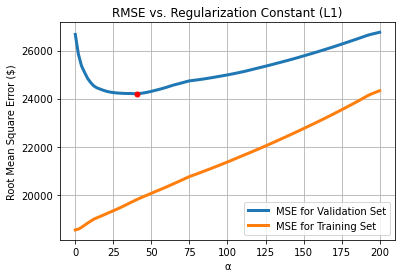

In [10]:
best_alpha = alphas[np.argmin(mse_valid)]

plt.plot(alphas,mse_valid, linewidth=3)
plt.plot(alphas,mse_train, linewidth=3)
plt.plot(best_alpha,np.min(mse_valid),'r.',markersize=10)
plt.legend(['MSE for Validation Set','MSE for Training Set'])
plt.xlabel('α')
plt.ylabel('Root Mean Square Error ($)')
plt.title('RMSE vs. Regularization Constant (L1)')
plt.grid()



print(f'Best Performance for α = {best_alpha}')
print(f'Best RMSE = ${np.min(mse_valid)}')

In [11]:
# Train Model with optimum alpha
large_model_lasso = Lasso(alpha=best_alpha)
large_model_lasso.fit(train_without_price, price_train)

Lasso(alpha=40.40404040404041)

## \[Step 7\] Testing the Models

### Single Variable Model

In [12]:
pred_test = small_model.predict(area_test.reshape(-1, 1))
rmse_small_model = mean_squared_error(pred_test, price_test, squared=False)

print(f'RMSE for Simple Model: ${rmse_small_model}')

RMSE for Simple Model: $55457.72481513969


### Multiple Variables - No Regularization

In [13]:
test_without_price = test.drop(price_label, 1).to_numpy()

pred = large_model.predict(test_without_price)
print("RMSE for multivariate model: $%.2f" % mean_squared_error(price_test, pred, squared=False))

RMSE for multivariate model: $36034.59


### Multiple Variables with optimum L1 Regularization

In [14]:
pred_test = large_model_lasso.predict(test_without_price)
print("RMSE for multivariate model with L1 regularization: $%.2f" % mean_squared_error(price_test, pred_test, squared=False))

RMSE for multivariate model with L1 regularization: $33752.73
